# Unsupervised Techniques: Clustering and Topic Models

In [130]:
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [131]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg


# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
    text = " ".join(text)
    
    # the output is text
    return text

In [133]:

small_model = gensim.models.KeyedVectors.load_word2vec_format('/Users/Ashrakat/Desktop/small-embeddings.txt', binary=False)

# Brifely about Word-embeddings

- Identify similarities between words
- By checking words in the vector space, word-embedding models can check analogies


In [ ]:
image = mpimg.imread("/Users/Ashrakat/Desktop/embedding.png")
plt.gcf().set_size_inches(15, 15)
plt.imshow(image)
plt.show()

Check this link out!
https://anvaka.github.io/pm/#/galaxy/word2vec-wiki?cx=-3284&cy=-7937&cz=3838&lx=-0.1558&ly=0.8739&lz=0.3926&lw=0.2406&ml=300&s=1.75&l=1&v=d50_clean

In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

#from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#define function to display scappterplot
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [ ]:
display_pca_scatterplot(small_model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [ ]:
display_pca_scatterplot(small_model, sample=300)


# Clustering (k-means)

 - Unsupervised learning method 
 - partition n observations (i.e., documents) into k clusters 
 - in which each observation belongs to the cluster with the nearest mean.


### What is a cluser

-  Cluster refers to a collection of data points aggregated together because of certain similarities.

### How does k-means work?

- Assigning subgroups in your data - see to which subgroup your data belings
- You assign a target number k which will refer to the number of centroid needed in the dataset
- A centroid will be the real location of the center of a cluster
- Data points is allocated to each of the clusters through reducing the in-cluster sum of squares. 

### What could be issues?

- Very coarse-grained (1 doc - 1 cluster)
- Numbers of clusters have to be assigned in advance
- Difficult to evaluate


### Example with random data

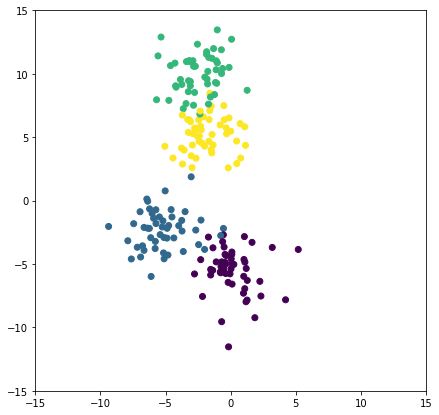

In [51]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# create blobs - helps us generate data samples or datasets
# you can also use instead the np.random.rand to create random samples
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.gcf().set_size_inches(7, 7)
plt.show()

## k-means

In [36]:
from sklearn.cluster import KMeans 


X,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)


kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

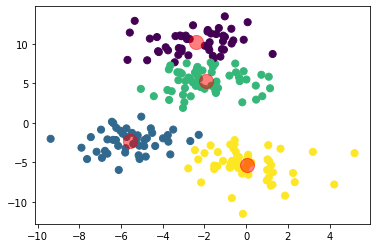

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

## let's try to cluster articles


In [52]:
# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/Users/Ashrakat/Desktop/rt_dataset.tsv", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
titles =  []

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    title = line.split("\t")[1]
    text = line.split("\t")[3]
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        titles.append(title)
print ("ready!")

ready!


In [64]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus)
y = np.array(titles) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [55]:
X

array([[-0.03445677,  0.2753192 , -0.03191321, ...,  0.28890894,
        -0.07130762, -0.14887733],
       [ 0.26499746, -0.04360646,  0.18654193, ...,  0.27466192,
         0.1072257 ,  0.11056739],
       [ 0.29113968,  0.19268164, -0.07239093, ..., -0.13055644,
        -0.12949042, -0.07908018],
       ...,
       [ 0.22631538, -0.03659752,  0.14289939, ...,  0.11477951,
        -0.1022856 , -0.15952698],
       [ 0.04862655, -0.07906676, -0.05544896, ...,  0.19787385,
        -0.04399268, -0.00261979],
       [ 0.32110414,  0.42935437, -0.09415624, ..., -0.23040828,
        -0.02120342, -0.07751126]])

In [56]:
y

array(['Putin: We don’t approve of WADA hackers, but information they leaked raises questions',
       'Episode 876',
       'British aviator completes 3-month journey from UK to Australia in vintage biplane',
       "Hillary Clinton diagnosed with pneumonia, cancels California campaign trip, 'Ellen' appearance",
       'Ronaldinho and Riquelme offer to come out of retirement to help plane crash team Chapecoense',
       'NATO & European leaders whip up hysteria over ‘myth’ of nuclear threat from Russia – Lavrov',
       'US ‘Gremlin’ drones designed to cause missile defense mayhem (VIDEO)',
       '‘Definitely a hero’: Ohio grandma died protecting grandkids',
       'Boris the farmer: UK foreign secretary’s sister reveals his quiet past as Kibbutz volunteer',
       'New photos reveal Russian advanced T-50 fighter plane test-flying',
       'Russia losing patience with Google over non-compliance with antitrust ruling',
       'Germany accused of ‘paying’ African countries to take back

In [54]:
# these are the labels we obtain
kmeans.labels_

array([3, 2, 8, 6, 3, 0, 7, 9, 6, 7, 2, 0, 6, 8, 6, 5, 3, 9, 2, 6, 0, 1,
       1, 0, 0, 0, 6, 4, 4, 6, 8, 6, 9, 6, 0, 6, 5, 9, 9, 3, 2, 0, 2, 1,
       9, 7, 9, 4, 8, 3, 6, 6, 9, 2, 0, 0, 2, 0, 0, 1, 0, 9, 5, 3, 3, 5,
       0, 0, 1, 4, 2, 0, 6, 9, 0, 6, 2, 9, 3, 1, 8, 0, 0, 6, 0, 0, 0, 8,
       6, 2, 1, 7, 0, 6, 8, 6, 3, 2, 0, 1, 0, 2, 8, 7, 1, 1, 4, 6, 0, 0,
       2, 0, 0, 6, 0, 8, 1, 5, 3, 9, 6, 2, 2, 9, 2, 6, 5, 0, 6, 0, 2, 8,
       8, 1, 8, 0, 1, 0, 1, 3, 2, 8, 5, 9, 6, 6, 0, 1, 1, 6, 5, 2, 4, 0,
       2, 0, 6, 6, 1, 3, 8, 7, 0, 5, 5, 1, 5, 6, 5, 4, 3, 1, 1, 0, 6, 0,
       4, 1, 5, 4, 9, 0, 6, 0, 9, 4, 4, 6, 0, 6, 1, 0, 5, 1, 4, 6, 1, 8,
       2, 1, 8, 8, 6, 9, 8, 8, 5, 0, 8, 2, 7, 0, 0, 3, 2, 4, 4, 0, 5, 9,
       1, 5, 0, 6, 3, 0, 9, 1, 5, 0, 2, 2, 2, 0, 9, 0, 7, 9, 2, 2, 2, 1,
       6, 6, 2, 1, 6, 2, 2, 7, 3, 8, 0, 8, 0, 7, 5, 6, 8, 1, 5, 0, 9, 6,
       2, 7, 3, 8, 6, 1, 1, 5, 0, 1, 0, 9, 0, 8, 2, 9, 4, 1, 9, 0, 8, 8,
       0, 2, 4, 9, 5, 6, 9, 9, 2, 0, 4, 6, 8, 9, 5,

In [59]:
# to see which docs are in which clusters, we need to loop over all labels

# so the number of clusters
for i in range(10):
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

this is cluster number 0
NATO & European leaders whip up hysteria over ‘myth’ of nuclear threat from Russia – Lavrov
Germany accused of ‘paying’ African countries to take back ‘foreign’ asylum seekers
NATO boosts Eastern Europe force & drills, ignoring Russia’s calls
Russia sets up free trade zone with Syria
Justice Ministry defines ‘political activity’ to amend ‘Foreign Agents Law’
NATO won’t speculate on who struck aid convoy in Syria – Stoltenberg to RT
TPP 'fundamentally flawed,' should be resisted - UN human rights expert
Putin: ‘EU is Russia’s friend; NATO is the problem’
Project Fear? US general says Brexit could ‘weaken NATO’
US in denial over sponsoring terrorism is why Syrian war rages on
Kiev continues to undermine the Minsk Agreements
Netanyahu calls Putin to discuss Palestinian-Israeli peace talks revival
NATO war with Russia ‘not likely’ in 2017, UK Defence Secretary says
EU warns Greece could be sealed off from Schengen zone over its handling of refugee crisis
‘Japanese 

Supermoon exposes UFO-like object passing by (VIDEO)
Beauties save the world
Ethereal images capture meteor speeding over molten lava (PHOTOS)
Leaked Flydubai recorder data reveals argument, panic in cockpit before ‘fatal nosedive’
Episode 1006
Elon Musk says Tesla’s self-driving feature is ‘probably better than a person right now’
RT Space 360: This is what your morning routine looks like on the ISS
SpaceX home movies: Watch 4 years of Falcon 9 development in 4 minutes (VIDEO)
Discovery of three giant planets could help find sustainable worlds
2bn-yo water found deep underground offers clues to possible life on other planets
Beautiful Tigon is born - First lioness and tiger cub in Russia
Astronomers discover snow surrounding new star for the first time
Dragon strike: Komodo monitor stalks squirrel after rodent tumbles into cage (GRAPHIC VIDEO)
Feline cat-ching ride on back of scooter is best thing you’ll see today (VIDEO)
Talented engineer revives paralyzed limb using scrap metal
Nowh

In [60]:
 #let's count which are the most popular words in the titles of each cluster
from collections import Counter

for i in range(10):
    
    # we create a list where we put the words from the titles
    title_words = []
    
    print ("this is cluster number",i)
    for k in range(len(titles)):
        # we clean the title with our pipeline
        title = nlp_pipeline(titles[k]).split(" ")
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in title:
                title_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(title_words).most_common(10)
    print (most_common)
    print (" ")

this is cluster number 0
[('russia', 33), ('russian', 27), ('u', 21), ('eu', 19), ('nato', 14), ('putin', 14), ('syria', 13), ('europe', 11), ('say', 10), ('new', 10)]
 
this is cluster number 1
[('syrian', 17), ('isi', 13), ('police', 12), ('video', 12), ('u', 11), ('kill', 9), ('force', 9), ('turkey', 8), ('thousand', 8), ('border', 7)]
 
this is cluster number 2
[('episode', 14), ('russian', 14), ('u', 8), ('russia', 7), ('ban', 6), ('clinton', 5), ('assange', 5), ('probe', 5), ('police', 5), ('rt', 5)]
 
this is cluster number 3
[('russian', 8), ('video', 8), ('world', 6), ('russia', 6), ('rio', 5), ('team', 4), ('fan', 4), ('title', 4), ('retirement', 3), ('player', 3)]
 
this is cluster number 4
[('video', 16), ('nasa', 5), ('space', 5), ('new', 5), ('first', 5), ('planet', 5), ('could', 5), ('capture', 4), ('star', 4), ('find', 4)]
 
this is cluster number 5
[('oil', 13), ('u', 11), ('russia', 9), ('bank', 6), ('since', 6), ('russian', 6), ('high', 5), ('chinese', 5), ('want', 5

In [63]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

### For all of my mean girls fans out there! 

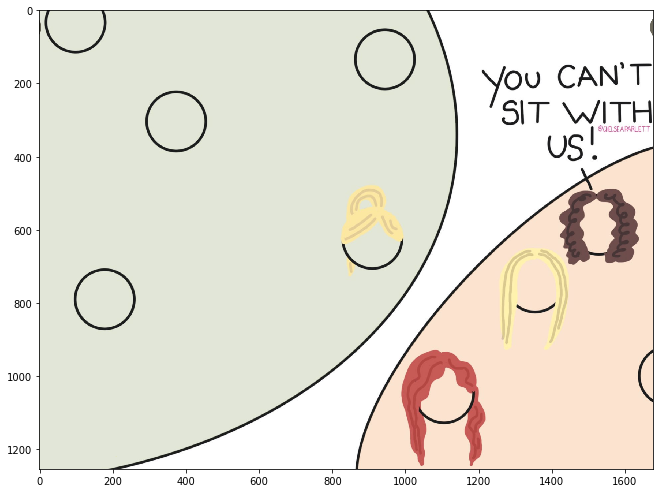

In [58]:
image = mpimg.imread("/Users/Ashrakat/Desktop/kmeangirls.png")
plt.gcf().set_size_inches(11, 11)
plt.imshow(image)
plt.show()

# Topic Modelling

### Instead of assigning each document to a single cluster
### The goal is to identify the underlying topics of each document and group them consequently.

- In k-means clustering, each observation—for our purposes, each document—can be assigned to one, and only one, cluster. 
- Topic models, however, are mixture models. This means that each document is assigned a probability of belonging to a latent theme or “topic.”



### What are these topics?

- Groups of tokens that are likely to appear in the same context 
- Topics explain co-occurrences of words in documents with sets of semantically related words, called topics. 
- A hidden structure that determines how tokens appear in the corpus

### Latent Dirichlet Allocation (Gibbs sampling)

**Determine the probability that each document is associated with a given theme or topic.**

**The distribution of topics in documents and distribution of words in topics have a Dirichlet prior **


1. Inizialize topic assignments randomly (choose k topics, very difficult and consequential decision)
  * Words are assigned randomly to opics
  
2. For each iteration
 * For each document
 * For each word re-assign topic to word, given:
 
    - all other words in the doc and their topic-assignment (dirichlet prior) - prevelance of word in a doc
    - all other occurrences of the same word in other docs (dirichlet prior)


## Outputs:

1. Words - associated with the k topics
2. Documents - associated with k topics

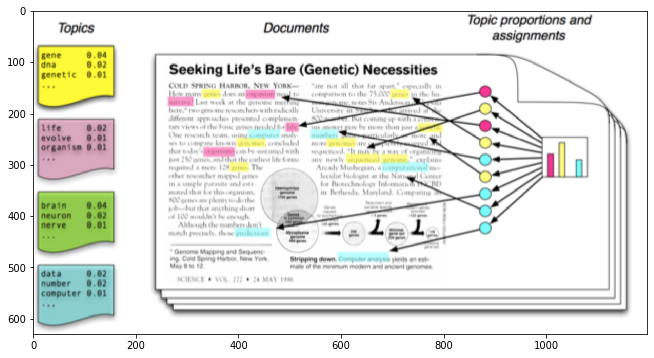

In [106]:
image = mpimg.imread("/Users/Ashrakat/Desktop/topics.png")
plt.gcf().set_size_inches(11, 11)
plt.imshow(image)
plt.show()

Source: Blei, David M. "Probabilistic topic models." Communications of the ACM 55.4 (2012): 77-84.

## Use carefully!

- sometimes unituitive
- hard to interpret often
- "making educated guesses about how words cohere into different latent themes by identifying patterns in the way they co-occur within documents." - Chris Bail

In [114]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
        
    # the output is text
    return text

In [115]:
#topic models, finally!

import codecs, os


content = []
doc = open("/Users/Ashrakat/Desktop/sascat_excerpt.tsv","r").read().strip().split("\n")
for line in doc[2:]:
            sent = line.split("\t")[10]
            sent = nlp_pipeline(sent)
            if len(sent)>1:
                content.append(sent)


In [116]:
content

[['require',
  'delivery',
  'excess',
  'defense',
  'article',
  'nato',
  'ally',
  'major',
  'ally',
  'southern',
  'southeastern',
  'flank',
  'nato',
  'give',
  'priority',
  'delivery',
  'article',
  'country',
  'prohibits',
  'six',
  'month',
  'act',
  'enactment',
  'expenditure',
  'fund',
  'make',
  'available',
  'pursuant',
  'act',
  'provide',
  'assistance',
  'yugoslavia',
  'direct',
  'secretary',
  'treasury',
  'instruct',
  'executive',
  'director',
  'international',
  'financial',
  'institution',
  'oppose',
  'assistance',
  'yugoslavia',
  'exempts',
  'prohibition',
  'assistance',
  'support',
  'democratic',
  'party',
  'movement',
  'emergency',
  'humanitarian',
  'assistance',
  'make',
  'prohibition',
  'inapplicable',
  'individual',
  'republic',
  'yugoslavia',
  'hold',
  'free',
  'fair',
  'election',
  'engage',
  'pattern',
  'human',
  'right',
  'violation',
  'secretary',
  'state',
  'certifies',
  'yugoslavia',
  'make',
  'sig

In [117]:
from gensim import corpora, models

# for running LDA in gensim we need a dictionary of all the words
dictionary = corpora.Dictionary(content)

# and to count the word frequency in each doc
X = [dictionary.doc2bow(text) for text in content]

print ("ready!")

ready!


In [127]:
ldamodel = models.ldamodel.LdaModel(X, num_topics=10, id2word = dictionary, iterations=500)
print ("done!")

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/g

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/g

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/g

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/g

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:

/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:776: DeprecationWarning: `logsumexp` is deprecated!
Importing `logsumexp` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.logsumexp` instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/anaconda/lib/python3.6/site-packages/gensim/models/ldamodel.py:

done!


In [128]:
for topic in ldamodel.print_topics(num_words=7):
    print (topic)

(0, '0.021*"government" + 0.020*"belarus" + 0.012*"support" + 0.009*"assistance" + 0.009*"state" + 0.008*"president" + 0.008*"act"')
(1, '0.020*"state" + 0.016*"united" + 0.014*"assistance" + 0.012*"government" + 0.010*"country" + 0.009*"polish" + 0.008*"program"')
(2, '0.020*"state" + 0.012*"fund" + 0.011*"president" + 0.011*"assistance" + 0.010*"act" + 0.010*"country" + 0.007*"appropriate"')
(3, '0.029*"assistance" + 0.016*"fund" + 0.016*"president" + 0.015*"government" + 0.014*"sec" + 0.012*"act" + 0.012*"make"')
(4, '0.020*"assistance" + 0.017*"country" + 0.016*"president" + 0.013*"act" + 0.012*"state" + 0.011*"foreign" + 0.010*"prohibit"')


In [129]:
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, X,dictionary)
vis

#saliency = term_proportion * distinctiveness


/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.016283  0.086502       1        1  38.284826
4     -0.022841  0.034537       2        1  32.595944
0     -0.104120 -0.037998       3        1  13.714545
2      0.060588 -0.039663       4        1   9.933292
1      0.050090 -0.043378       5        1   5.471393, topic_info=    Category       Freq           Term      Total  loglift  logprob
57   Default  56.000000          state  56.000000  30.0000  30.0000
327  Default  18.000000        belarus  18.000000  29.0000  29.0000
106  Default  37.000000         united  37.000000  28.0000  28.0000
76   Default  58.000000     government  58.000000  27.0000  27.0000
120  Default  18.000000        program  18.000000  26.0000  26.0000
..       ...        ...            ...        ...      ...      ...
77    Topic5   1.185327           take  16.537129   0.2700  -5.3809
436   Topic5   1.206942      committee  21.759136   0.0137  -5.3629
116   Topic5   1.170383        respect  16.655347   0.2502  -5.3936
423   Topic5   1.160133  appropriation  19.180174   0.1003  -5.4024
20    Topic5   1.200302           fund  54.923480  -0.9177  -5.3684

[382 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
573       1  0.694774    abortion
573       4  0.277910    abortion
102       5  0.821560  accurately
17        1  0.404293         act
17        2  0.385041         act
...     ...       ...         ...
249       2  0.658521       zaire
249       3  0.164630       zaire
249       5  0.164630       zaire
471       5  0.821527    zimbabwe
848       2  0.622023        zone

[606 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])

### Take a look at what Structural Topic Models are: they employ meta data about the document to improve the assignmnet to topics

# Exercises

**Exercise 1- Topic Modelling **

You will work with US Manifestos - check the folder on Github.

1. Loop over each of the articles in the folder, open it.
2. You need to have a structure of a list of lists, each line is a line in the Manifestos
3. Clean your data with a suitable NLP Pipeline
4. Use LDA for Topic Modelling:
5. What are the main topics in your first sentence?
6. What are the main topic in all of your corpus?
7. Do they make sense? Say you want to identify the main sanctions violations as this is a dataset about economic sanctions issued as laws by the US Congress. Would topic modelling work?


**Excercise 2 - Clustering Visualization**

- Visualize the clusters in rt_dataset

** Excercise 3 - Topic Modelling again**

- Discover what are the topics (20) using LDA of the sascat dataset
- Discover what are the 20 most common nouns in the sascat dataset(of course after cleaning your text)
- Please comment on the comparision of topic-modelling to the naive approach?

** Excercise 4 - Clustering**

1. Use the k-means clustering (10) method on the sascat_excerpt dataset
2. Please comment on what you think is the main difference between Clustering and Topic Modelling
3. Please compare the results between clustering and topic modelling, for which type of research questions would these results be suitable

Try visualizing both maybe it will help!

